<a href="https://colab.research.google.com/github/AzraSaf/MLCW/blob/main/MLCW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports & Dataset loading, Visualization

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTENC
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from sklearn.utils.class_weight import compute_class_weight
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Dataset Loading & Visualization

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

None


Unique Values in Each Column:


,Column,Unique Values,Number of Unique Values
0,age,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5...",78
1,job,"[housemaid, services, admin., blue-collar, tec...",12
2,marital,"[married, single, divorced, unknown]",4
3,education,"[basic.4y, high.school, basic.6y, basic.9y, pr...",8
4,default,"[no, unknown, yes]",3
5,housing,"[no, yes, unknown]",3
6,loan,"[no, yes, unknown]",3
7,contact,"[telephone, cellular]",2
8,month,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ...",10
9,day_of_week,"[mon, tue, wed, thu, fri]",5


Summary Statistics for Numeric Columns:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Summary Statistics for Categorical Columns:


,Unique Values,Mode,Frequency of Mode,Count
job,12,admin.,10422,41188
marital,4,married,24928,41188
education,8,university.degree,12168,41188
default,3,no,32588,41188
housing,3,yes,21576,41188
loan,3,no,33950,41188
contact,2,cellular,26144,41188
month,10,may,13769,41188
day_of_week,5,thu,8623,41188
poutcome,3,nonexistent,35563,41188


Occurrences of 'y' in: job
job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
dtype: int64

Occurrences of 'y' in: marital
marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948
          yes     1620
unknown   no        68
          yes       12
dtype: int64

Occurrences of 'y' in: education
education       

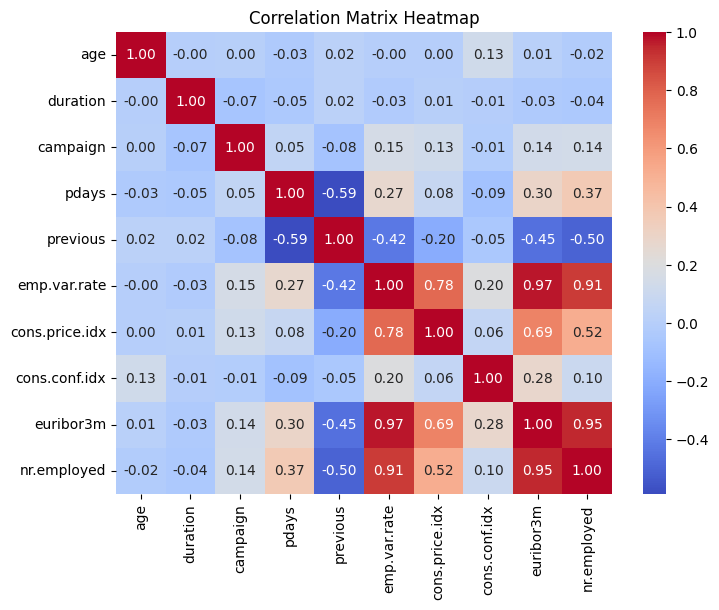

In [5]:
# Load the dataset
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Display the first few rows of the dataset to understand its structure
display(data.head())

# Display basic information about the dataset
display(data.info())

# Unique values for each column
unique_values = pd.DataFrame({
    'Column': data.columns,
    'Unique Values': [data[col].unique() for col in data.columns],
    'Number of Unique Values': data.nunique().values
})
print("\nUnique Values in Each Column:")
display(unique_values)

# Use the describe() method for numeric columns to generate the table
summary_stats = data.describe()
print("Summary Statistics for Numeric Columns:")
display(summary_stats)

# Generate a summary for categorical columns
categorical_cols = data.select_dtypes(exclude=['number'])
categorical_summary = pd.DataFrame({
    'Unique Values': categorical_cols.nunique(),
    'Mode': categorical_cols.mode().iloc[0],
    'Frequency of Mode': categorical_cols.apply(lambda col: col.value_counts().iloc[0]),
    'Count': categorical_cols.notnull().sum()
})
print("Summary Statistics for Categorical Columns:")
display(categorical_summary)

# Occurrences of target 'y' for each categorical feature
for col in categorical_cols:
    feature_summary = data.groupby([col, 'y']).size()
    print(f"Occurrences of 'y' in: {col}")
    print(feature_summary)
    print()

# Occurrences of target 'y' for each numerical feature
numerical_columns = data.select_dtypes(include=['number']).columns
for col in numerical_columns:
    print(f"Occurrences of 'y' in: {col}")
    temp_binned_col = f'temp_binned_{col}'
    data[temp_binned_col] = pd.cut(data[col], bins=10)
    # Group by the binned column and the target variable 'y', and count occurrences
    binned_summary = data.groupby([temp_binned_col, 'y'], observed=False).size()
    print(binned_summary)
    print("\n")
    # Remove the temporary binned column
    data.drop(columns=temp_binned_col, inplace=True)

# Compute the correlation matrix
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap", fontsize=12)
plt.show()

# Data Pre-Processing

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
Duplicate rows in the dataset: 12
Duplicate rows after removal: 0


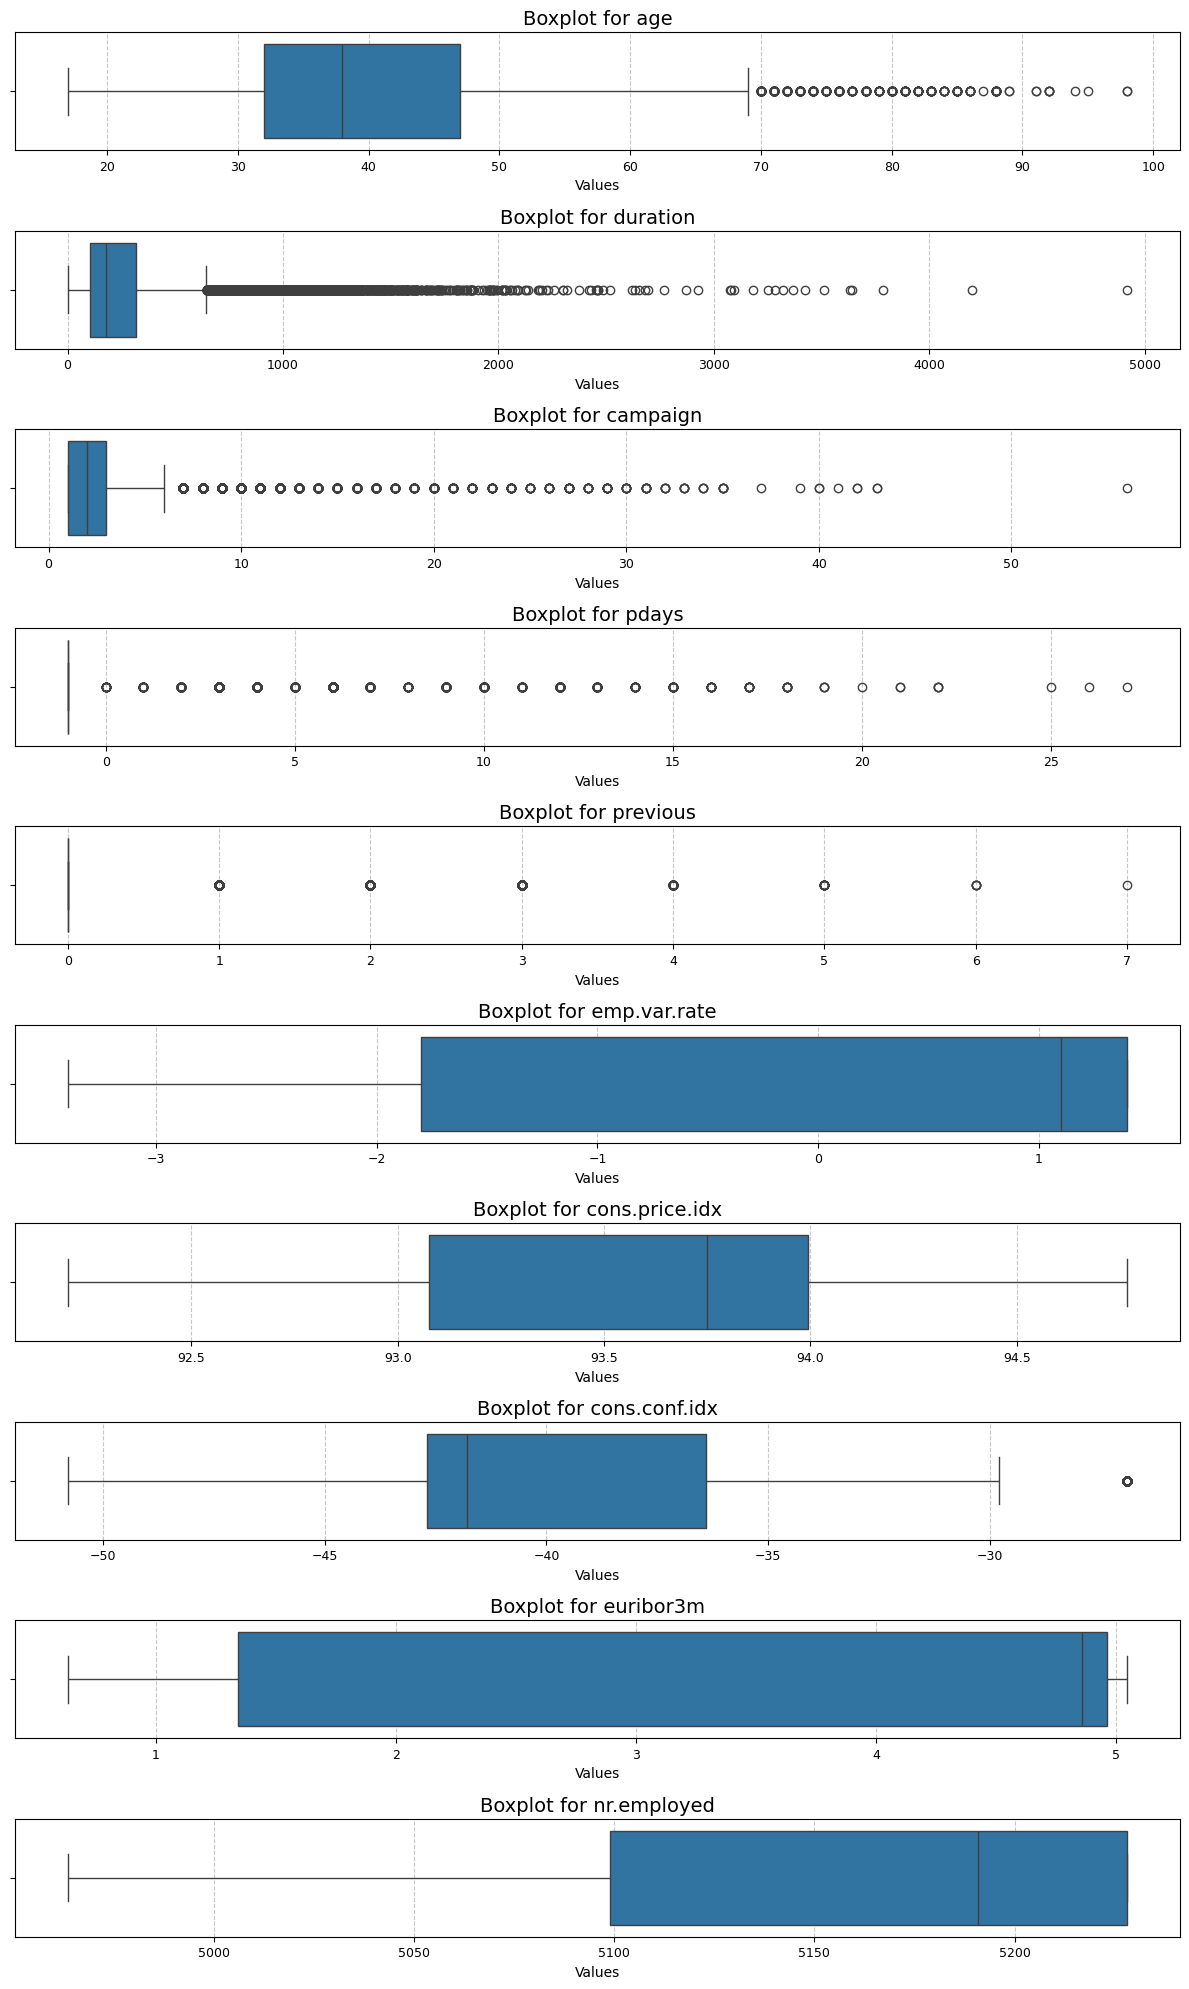


Feature: age -> 468 outliers (1.14%)

Feature: duration -> 2963 outliers (7.20%)

Feature: campaign -> 2405 outliers (5.84%)

Feature: pdays -> 1515 outliers (3.68%)

Feature: previous -> 1515 outliers (3.68%)

Feature: emp.var.rate -> 0 outliers (0.00%)

Feature: cons.price.idx -> 0 outliers (0.00%)

Feature: cons.conf.idx -> 446 outliers (1.08%)

Feature: euribor3m -> 0 outliers (0.00%)

Feature: nr.employed -> 0 outliers (0.00%)

Class Distribution Pre-SMOTE:
y
0    25573
1     3247
Name: count, dtype: int64

Class Distribution Post-SMOTE:
y
0    25573
1    25573
Name: count, dtype: int64
Scaled Numerical Features (Training Set):
        age  duration  campaign  pdays  previous  emp.var.rate  \
0  0.974574  0.222206 -0.001458    0.0       0.0     -0.764739   
1 -0.014156 -1.467196  2.894502    0.0       0.0      1.090562   
2 -0.823116  0.007452  0.722532    0.0       0.0      1.090562   
3  1.513881  0.780568  2.894502    0.0       0.0      1.090562   
4 -1.272539 -0.674990 -0.725

In [6]:
# Data Cleaning and Preparation

# Check for missing values
print(data.isnull().sum())

# Check for duplicate entries
duplicate_rows_count = data.duplicated().sum()
print(f"Duplicate rows in the dataset: {duplicate_rows_count}")

# Eliminate duplicate entries
data = data.drop_duplicates()
duplicate_rows_count = data.duplicated().sum()
print(f"Duplicate rows after removal: {duplicate_rows_count}")

# Replace invalid values in 'pdays'
data['pdays'] = data['pdays'].replace(999, -1)

# Correct inconsistencies: Set 'previous' to 0 where 'pdays' is -1 but 'previous' isn't 0
data.loc[(data['pdays'] == -1) & (data['previous'] != 0), 'previous'] = 0

# Drop rows where duration equals to 0 because it has too much predictive power
data = data[data['duration'] != 0]

# Identify numerical and categorical columns
num_columns = data.select_dtypes(include=['int64', 'float64']).columns
cat_columns = data.select_dtypes(include=['object']).columns

# Visualize numerical features using boxplots
fig, axes = plt.subplots(nrows=len(num_columns), ncols=1, figsize=(12, 20), sharex=False)

for idx, feature in enumerate(num_columns):
    sns.boxplot(data=data, x=feature, ax=axes[idx], orient="h")
    axes[idx].set_title(f"Boxplot for {feature}", fontsize=14)
    axes[idx].set_xlabel("Values", fontsize=10)
    axes[idx].grid(axis="x", linestyle="--", alpha=0.7)
    axes[idx].tick_params(axis="x", labelsize=9)
    axes[idx].tick_params(axis="y", labelsize=9)

plt.tight_layout()
plt.show()

# Function to detect outliers using the IQR method
def count_outliers(dataframe, col):
    Q1 = dataframe[col].quantile(0.25)
    Q3 = dataframe[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[col] < lower_limit) | (dataframe[col] > upper_limit)][col]
    return len(outliers)

# Display the count and percentage of outliers for each numerical feature
for feature in num_columns:
    outlier_count = count_outliers(data, feature)
    outlier_percentage = (outlier_count / len(data)) * 100
    print(f"\nFeature: {feature} -> {outlier_count} outliers ({outlier_percentage:.2f}%)")

# Cap outliers within acceptable range using the IQR method
def adjust_outliers(dataframe, col):
    Q1 = dataframe[col].quantile(0.25)
    Q3 = dataframe[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    dataframe[col] = dataframe[col].clip(lower=lower_limit, upper=upper_limit)

# Apply outlier capping to all numerical features
for feature in num_columns:
    adjust_outliers(data, feature)

# Split the dataset into predictors (features) and target variable
features = data.drop('y', axis=1)
target = data['y'].map({'yes': 1, 'no': 0})

# Partition the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)

# Retrieve the names of categorical columns in the training set
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Obtain indices of categorical features
cat_feature_indices = [X_train.columns.get_loc(col) for col in categorical_columns]

# Verify balanced class distribution
class_dist = pd.Series(y_train).value_counts()
print("\nClass Distribution Pre-SMOTE:")
print(class_dist)

# Handle class imbalance using SMOTENC for categorical features
smote_balancer = SMOTENC(categorical_features=cat_feature_indices, random_state=42)
X_train, y_train = smote_balancer.fit_resample(X_train, y_train)

# Verify balanced class distribution
class_distribution = pd.Series(y_train).value_counts()
print("\nClass Distribution Post-SMOTE:")
print(class_distribution)

# Standardize numerical features
scaler = StandardScaler()

if len(categorical_columns) > 0:
    # Segregate categorical and numerical features
    X_train_num = X_train.drop(columns=categorical_columns)
    X_train_cat = X_train[categorical_columns]

    X_test_num = X_test.drop(columns=categorical_columns)
    X_test_cat = X_test[categorical_columns]

    # Scale numerical features
    X_train_num = scaler.fit_transform(X_train_num)
    X_test_num = scaler.transform(X_test_num)

    # Convert scaled numerical data back to DataFrame
    X_train_num = pd.DataFrame(X_train_num, columns=X_train.drop(columns=categorical_columns).columns, index=X_train.index)
    X_test_num = pd.DataFrame(X_test_num, columns=X_test.drop(columns=categorical_columns).columns, index=X_test.index)

    # Recombine scaled numerical and unscaled categorical features
    X_train = pd.concat([X_train_num, X_train_cat], axis=1)
    X_test = pd.concat([X_test_num, X_test_cat], axis=1)
else:
    # If no categorical columns exist, scale the entire dataset
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

print("Scaled Numerical Features (Training Set):")
print(X_train_num.head())

# Encode categorical variables (if present)
if len(categorical_columns) > 0:
    ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    # Fit and transform the encoder on training data
    X_train_encoded = ohe_encoder.fit_transform(X_train[categorical_columns])
    X_train_encoded = pd.DataFrame(X_train_encoded, columns=ohe_encoder.get_feature_names_out(categorical_columns))

    # Transform the test data with the same encoder
    X_test_encoded = ohe_encoder.transform(X_test[categorical_columns])
    X_test_encoded = pd.DataFrame(X_test_encoded, columns=ohe_encoder.get_feature_names_out(categorical_columns))

    # Merge encoded categorical features with numerical features
    X_train = pd.concat([X_train.drop(columns=categorical_columns).reset_index(drop=True), X_train_encoded], axis=1)
    X_test = pd.concat([X_test.drop(columns=categorical_columns).reset_index(drop=True), X_test_encoded], axis=1)
else:
    # Reset indices if no categorical features exist
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)

print("\nEncoded Categorical Features (Training Set):")
print(X_train_encoded.head())

print("Preprocessing complete. Ready for training models.")


# Random Forest

Training & Evaluating the model

In [7]:
# Training a Random Forest Classifier
rf_model = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    criterion='entropy',
    max_depth=30,
    min_samples_leaf=1,
    n_estimators=350
)
rf_model.fit(X_train, y_train)

# Making predictions with the Random Forest model
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

In [8]:
# Evaluating the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf_proba)

print("Random Forest Classifier Results:")
print("Accuracy:", rf_accuracy)
print("ROC AUC Score:", rf_roc_auc)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Results:
Accuracy: 0.9016353626943006
ROC AUC Score: 0.9382572599421094
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     10960
           1       0.55      0.66      0.60      1392

    accuracy                           0.90     12352
   macro avg       0.75      0.80      0.77     12352
weighted avg       0.91      0.90      0.91     12352

Confusion Matrix:
[[10219   741]
 [  474   918]]


In [9]:
# Perform k-fold cross-validation for both models
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

print("Random Forest Cross-Validation Scores:")
print("Individual fold scores:", rf_cv_scores)
print("Mean CV Score:", rf_cv_scores.mean())
print("Standard Deviation:", rf_cv_scores.std())


Random Forest Cross-Validation Scores:
Individual fold scores: [0.84828935 0.96275296 0.95913579 0.95854922 0.96177534]
Mean CV Score: 0.9381005320296204
Standard Deviation: 0.04493310399779409


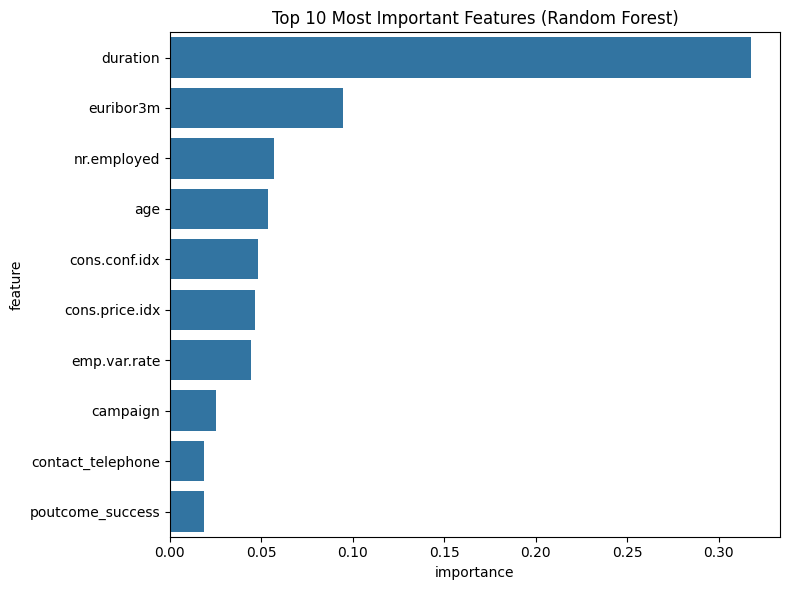

In [10]:
# Visualizing feature importance for Random Forest

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features (Random Forest)')
plt.tight_layout()
plt.show()

# Dimensionality Reduction(PCA)

In [11]:
#pca only for nn
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Print the number of components
print(f"Number of components selected: {pca.n_components_}")

Number of components selected: 27


# Neural Network

In [12]:
# Building the Neural Network model

nn_tf_model = Sequential([
# Input layer and first hidden layer
    Dense(512, input_dim=X_train.shape[1], activation='relu'),  # Increase neurons for better feature extraction
    BatchNormalization(),
    Dropout(0.4),  # Slightly higher dropout to reduce overfitting

    # Second hidden layer
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Third hidden layer
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Fourth hidden layer
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    # Fifth hidden layer
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    # Output layer
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compiling the model
nn_tf_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Adding early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),  # Convert list to numpy array
    y=y_train  # Replace with your training labels
)
class_weights = dict(enumerate(class_weights))

# Training the model
history = nn_tf_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Print model summary to display the parameters in a table format
nn_tf_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8211 - loss: 0.3980 - val_accuracy: 0.9527 - val_loss: 0.2186
Epoch 2/20
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8729 - loss: 0.2909 - val_accuracy: 0.9600 - val_loss: 0.2061
Epoch 3/20
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8801 - loss: 0.2758 - val_accuracy: 0.9541 - val_loss: 0.1968
Epoch 4/20
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8861 - loss: 0.2674 - val_accuracy: 0.9547 - val_loss: 0.2060
Epoch 5/20
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8906 - loss: 0.2573 - val_accuracy: 0.9679 - val_loss: 0.1706
Epoch 6/20
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8945 - loss: 0.2497 - val_accuracy: 0.9539 - val_loss: 0.1970
Epoch 7/20
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8992 - loss: 0.2438 - val_accuracy: 0.9792 - val_loss: 0.1666
Epoch 8/20
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8981 - loss: 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 574,725 (2.19 MB)

 Trainable params: 190,913 (745.75 KB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 381,828 (1.46 MB)

Evaluation Metrics

In [13]:
# Get predicted probabilities
y_pred_prob = nn_tf_model.predict(X_test)

# Convert probabilities to binary predictions (using a threshold of 0.5)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluate the model on the training set
train_loss, train_accuracy = nn_tf_model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Training Loss:", train_loss)

# Evaluate the model on the test set
test_loss, test_accuracy = nn_tf_model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:\n", report)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training Accuracy: 0.9326633810997009
Training Loss: 0.1724950075149536
Test Accuracy: 0.890705943107605
Test Loss: 0.24493122100830078
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.91      0.94     10960
     Class 1       0.51      0.75      0.61      1392

    accuracy                           0.89     12352
   macro avg       0.74      0.83      0.77     12352
weighted avg       0.91      0.89      0.90     12352

Confusion Matrix:
[[9960 1000]
 [ 350 1042]]


Loss & Accuracy Graph

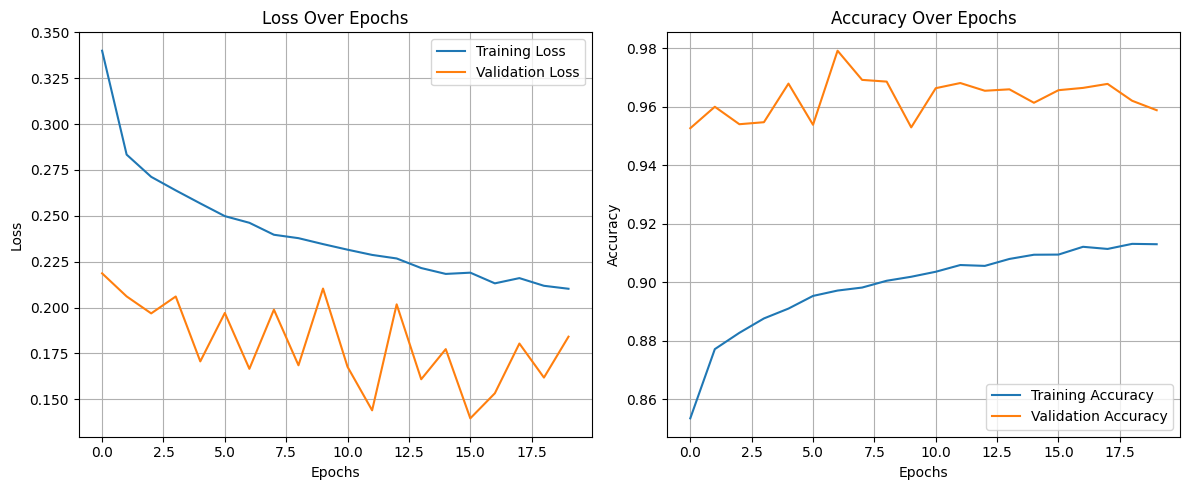

In [14]:
# Visualizing the training process
plt.figure(figsize=(12, 5))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()